In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
from google.colab import files
uploaded = files.upload()


Saving imdb.csv to imdb.csv


In [3]:

df = pd.read_csv("imdb.csv", sep=',')
print(df.head())

  Rank                                     Movie_name  Year Certificate  \
0    1                       The Shawshank Redemption  1994           R   
1    2                                  The Godfather  1972           R   
2    3                                The Dark Knight  2008       PG-13   
3    4  The Lord of the Rings: The Return of the King  2003       PG-13   
4    5                               Schindler's List  1993           R   

   Runtime_in_min                      Genre  Metascore Gross_in_$_M  \
0             142                      Drama       81.0        28.34   
1             175               Crime, Drama      100.0       134.97   
2             152       Action, Crime, Drama       84.0       534.86   
3             201   Action, Adventure, Drama       94.0       377.85   
4             195  Biography, Drama, History       94.0        96.90   

   Rating_from_10  
0             9.3  
1             9.2  
2             9.0  
3             9.0  
4             9.

In [4]:
df['Genre'] = df['Genre'].fillna('Unknown')
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')



In [5]:
genre_counts = df['Genre'].value_counts()


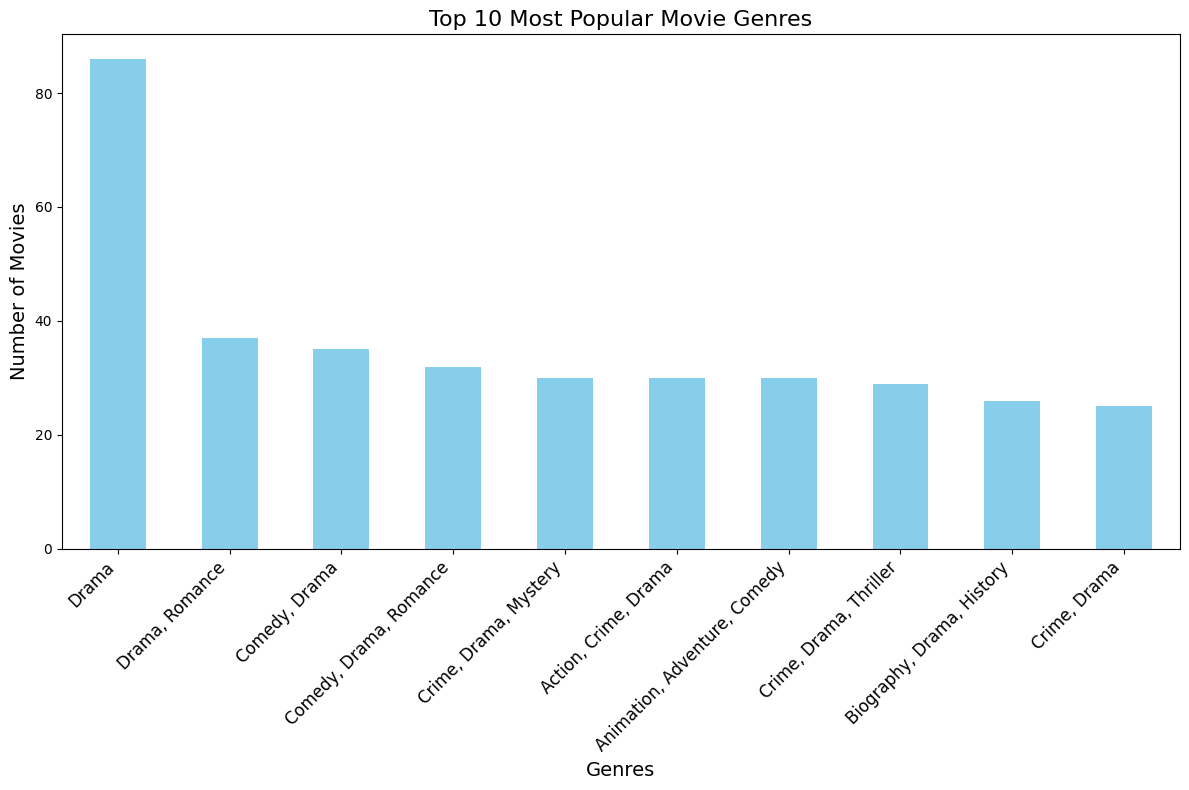

In [8]:

top_genres = genre_counts.sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 8))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Movie Genres', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


In [10]:
avg_ratings = df.groupby('Genre')['Rating_from_10'].mean()

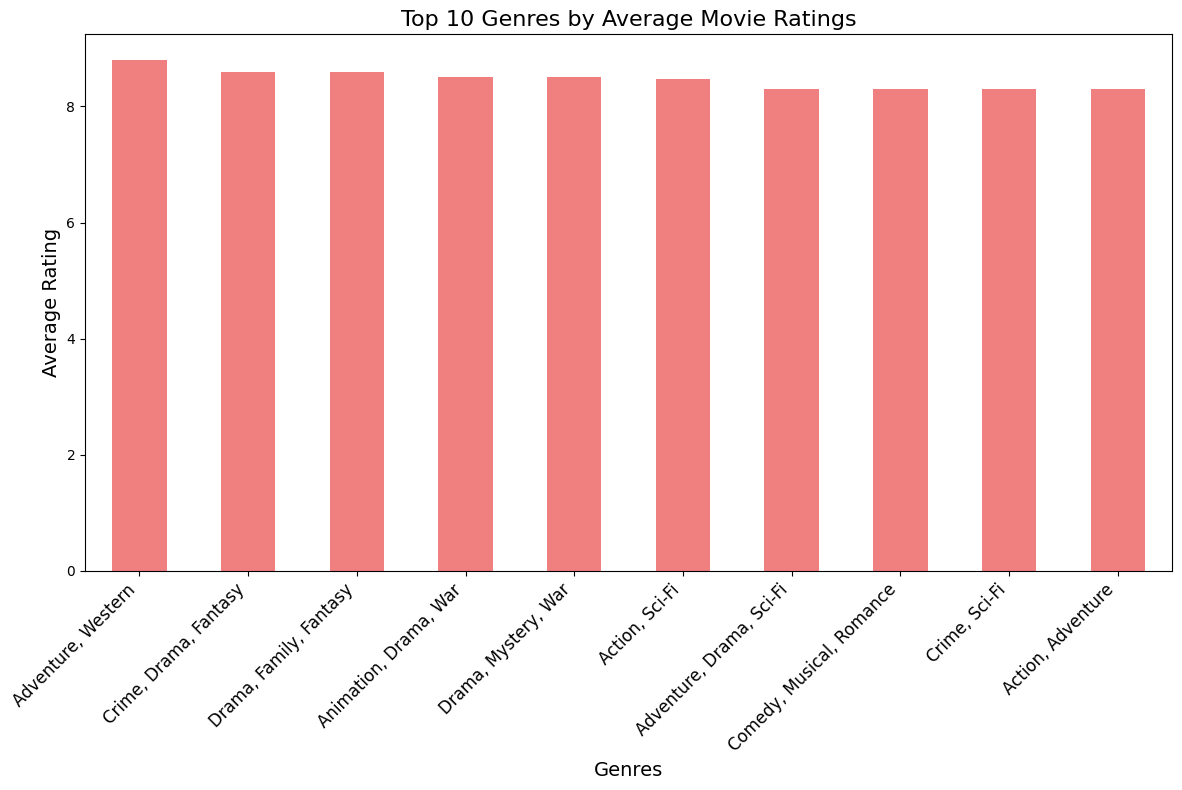

In [11]:

top_avg_ratings = avg_ratings.sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 8))
top_avg_ratings.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Genres by Average Movie Ratings', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
avg_ratings_by_year = df.groupby('Year')['Rating_from_10'].mean()

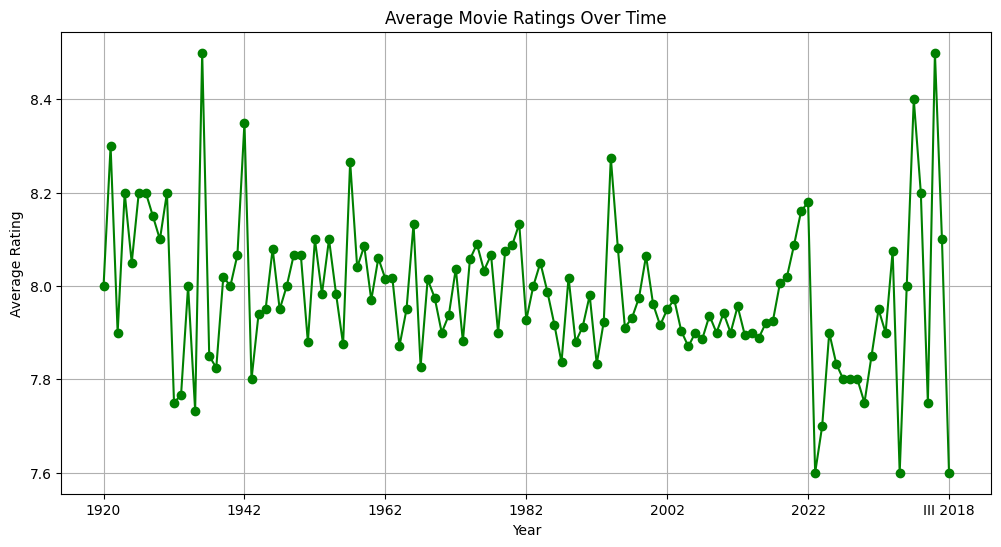

In [ ]:

plt.figure(figsize=(12,6))
avg_ratings_by_year.plot(kind='line', marker='o', color='green')
plt.title('Average Movie Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [ ]:
movie_titles = ' '.join(df['Movie_name'].dropna())

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_titles)


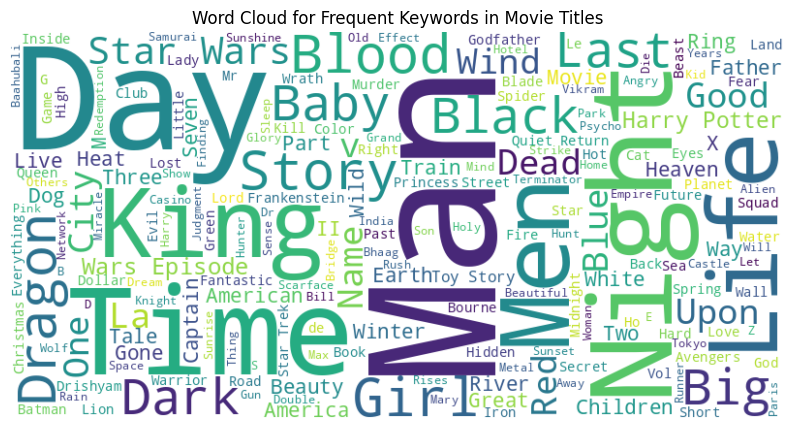

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Frequent Keywords in Movie Titles')
plt.show()